# importing required libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

### loading the dataset into pipeline 

In [3]:
df = pd.read_csv("dataframe_.csv")

In [6]:
df.shape

(1697, 2)

In [8]:
(df)

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


##### There are many ways to findout missing values
1) If the dataset is stored in pandas dataframe we can use isna() method to identify missing values.



2) If the dataset is stored in numpy array we can use  isnan() function to identify missing values.

so here my dataset is in pandasd dataframe so iam using isna() method


In [14]:
missing_values = df.isna().sum()
print(missing_values)

input     1
output    1
dtype: int64


we can clearly observe that our dataset has 1 missing and using (df.dropna()) method i had droped that missing row we can clearly checkout below and by applying that i had get that shape of dataset

In [15]:
## droping the missing values 

df = df.dropna()
df.shape

(1696, 2)

# ploting the graph between input and output features
1) line-plot


2)scatter-plot



3)box-plot

to check the relation between the features 

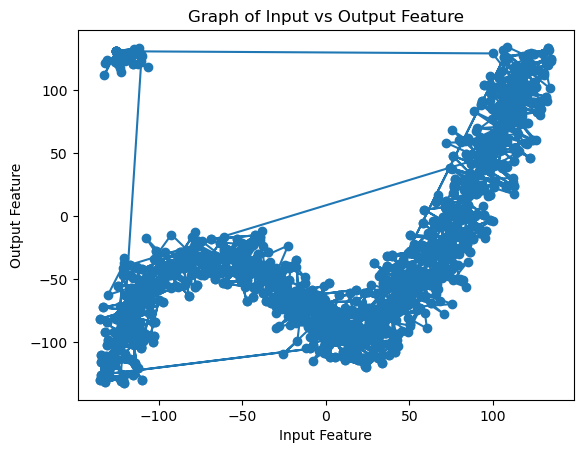

In [19]:
input_feature = df['input']
output_feature =df['output']


# line Plot the data
plt.plot(input_feature, output_feature , 'o-')

# Add labels and title
plt.xlabel('Input Feature')
plt.ylabel('Output Feature')
plt.title('Graph of Input vs Output Feature')

# Show the plot
plt.show()

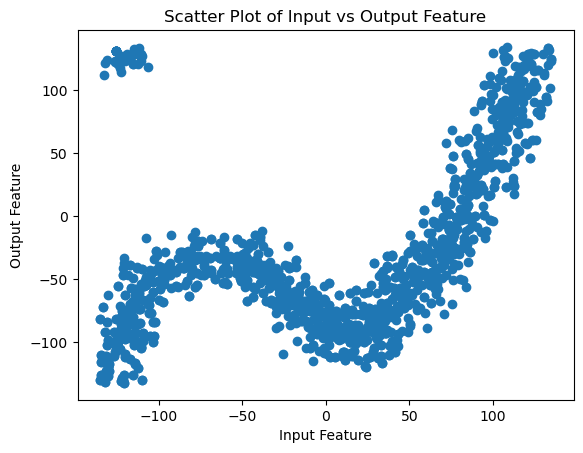

In [20]:
##scatter-plot


# Plot the data
plt.scatter(input_feature, output_feature)

# Add labels and title
plt.xlabel('Input Feature')
plt.ylabel('Output Feature')
plt.title('Scatter Plot of Input vs Output Feature')

# Show the plot
plt.show()


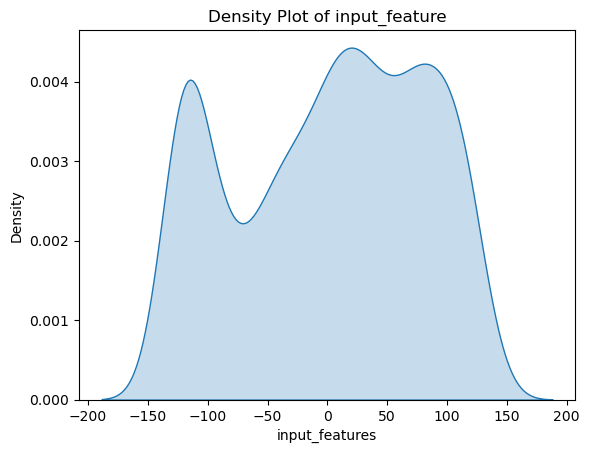

In [31]:

# density Plot the data
sns.kdeplot(input_feature, shade=True)

# Add labels and title
plt.xlabel('input_features')
plt.title('Density Plot of input_feature')

# Show the plot
plt.show()

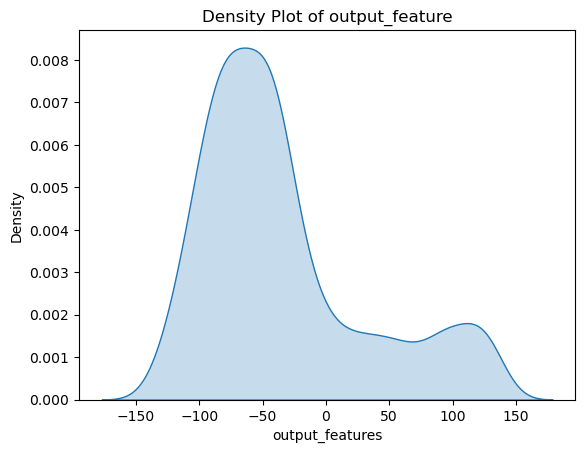

In [32]:
# density Plot the data
sns.kdeplot(output_feature, shade=True)

# Add labels and title
plt.xlabel('output_features')
plt.title('Density Plot of output_feature')

# Show the plot
plt.show()

###  Violin Plot: A violin plot is a combination of a box plot and a density plot. It displays the distribution of the data points as a violin-shaped plot that shows both the shape of the 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


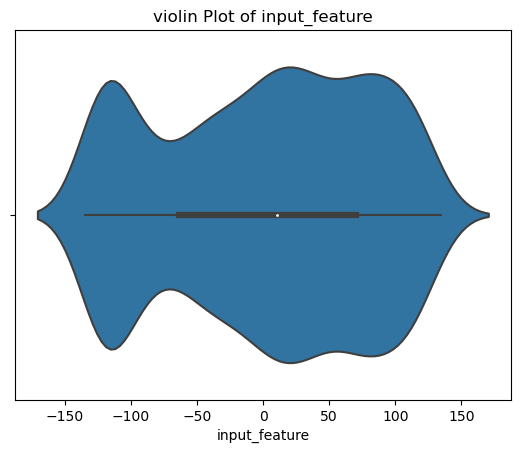

In [34]:
# violin plot for input_feature Plot the data
sns.violinplot(input_feature, shade=True)

# Add labels and title
plt.xlabel('input_feature')
plt.title('violin Plot of input_feature')

# Show the plot
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


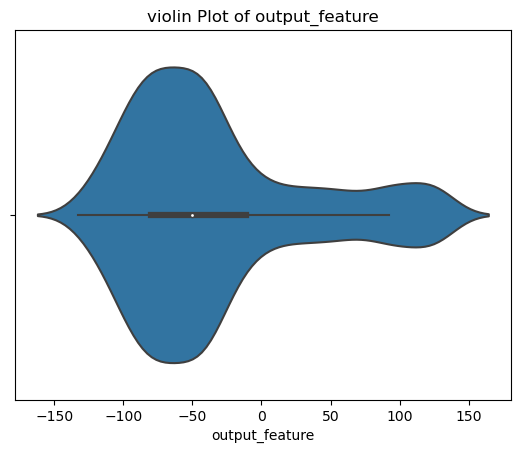

In [35]:
# violin plot for output_feature Plot the data
sns.violinplot(output_feature, shade=True)

# Add labels and title
plt.xlabel('output_feature')
plt.title('violin Plot of output_feature')

# Show the plot
plt.show()

## we can say that our dataset is not in gausiann or normal distribution  we have to convert to normal distribution

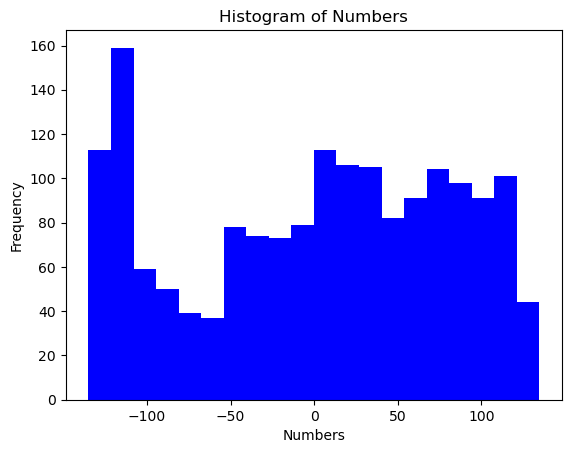

In [41]:
# hsitogram input_feature


# Plot the histogram
plt.hist(input_feature, bins=20, color='blue')

# Add labels and title
plt.xlabel('Numbers')
plt.ylabel('Frequency')
plt.title('Histogram of Numbers')

# Show the plot
plt.show()

# now i would like to remove outlire 

In [45]:

# Calculate the first quartile (25th percentile)
Q1 = input_feature.quantile(0.25)

# Calculate the third quartile (75th percentile)
Q3 = input_feature.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [(input_feature < lower_bound) | (input_feature > upper_bound)]

print("Outliers:", outliers)

Outliers: [0       False
1       False
2       False
3       False
4       False
        ...  
1692    False
1693    False
1694    False
1695    False
1696    False
Name: input, Length: 1696, dtype: bool]


In [50]:


# Calculate the first quartile (25th percentile)
Q1 = input_feature.quantile(0.25)

# Calculate the third quartile (75th percentile)
Q3 = input_feature.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
input_feature =input_feature[(input_feature >= lower_bound) & (input_feature <= upper_bound)]

print("Data without outliers:", data)

Data without outliers: 0      -122.740667
1      -121.531419
2      -134.917019
3      -120.605951
4      -129.894781
           ...    
1692     25.410184
1693     29.537304
1694     31.633331
1695     29.091458
1696     17.145296
Name: input, Length: 1696, dtype: float64


In [57]:
input_feature.shape  #ok we had removed the outliers from ourdata

(1696,)

# the another method to detect the outlire is z-score so we will use that 

In [61]:

# Calculate the mean
mean = input_feature.mean()

# Calculate the standard deviation
std = input_feature.std()

# Calculate the Z-scores
z_scores = (input_feature - mean) / std

# Define the Z-score threshold
threshold = 3

# Remove outliers
input_feature = input_feature[np.abs(z_scores) < threshold]

print("Data without outliers:", input_feature )

Data without outliers: 0      -122.740667
1      -121.531419
2      -134.917019
3      -120.605951
4      -129.894781
           ...    
1692     25.410184
1693     29.537304
1694     31.633331
1695     29.091458
1696     17.145296
Name: input, Length: 1696, dtype: float64


## we can also see the mean,standard deviation , and the z_scores 

In [63]:
print(mean)  
print(std)
print(z_scores)

1.159932645006416
79.00597019226221
0      -1.568244
1      -1.552938
2      -1.722363
3      -1.541224
4      -1.658795
          ...   
1692    0.306942
1693    0.359180
1694    0.385710
1695    0.353537
1696    0.202331
Name: input, Length: 1696, dtype: float64


## converting our data to normal distribution by applying log transformation

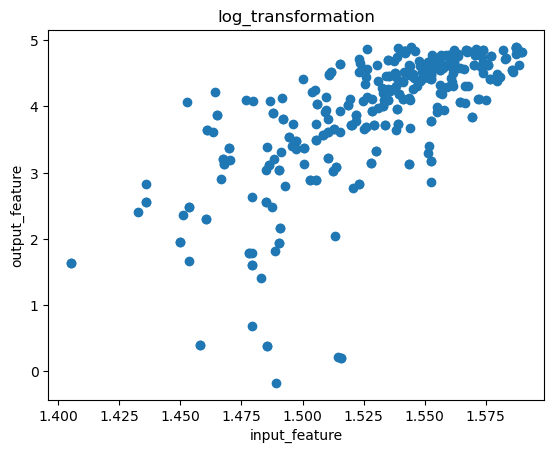

In [67]:
 if 0 in input_feature.unique():
        pass
else:
    input_feature = np.log(input_feature)
    output_feature = np.log(output_feature)
    plt.scatter(input_feature,output_feature)
    plt.xlabel('input_feature')
    plt.ylabel('output_feature')
    plt.title('log_transformation')
    plt.show()
        

In [80]:
feature_scale=[feature for feature in df.columns]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [81]:
scaler.transform(df[feature_scale])

array([[4.53397413e-02, 6.93310327e-03],
       [4.98256047e-02, 9.30582670e-03],
       [1.69973794e-04, 8.54545579e-03],
       ...,
       [6.18010263e-01, 1.70217594e-01],
       [6.08580851e-01, 1.02976786e-01],
       [5.64265003e-01, 1.15029199e-01]])

In [83]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['input', 'output']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [84]:
data.head()

,input,output,input,output
0,-122.740667,-130.572085,0.045340,0.006933
1,-121.531419,-129.938929,0.049826,0.009306
2,-134.917019,-130.141832,0.000170,0.008545
3,-120.605951,-125.760932,0.053259,0.024963
4,-129.894781,-112.785214,0.018801,0.073589


In [102]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [98]:
X_train, X_test, y_train, y_test = train_test_split(df['input'], df['output'], test_size=0.33, random_state=1)

In [99]:
X_train.shape

(1136,)

In [101]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[  36.13124575   61.6333313    26.69277228 ... -124.3666687    36.69202077
  112.19052   ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [103]:
# fit the model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
# make predictions
#yhat = model.predict(X_test)
# evaluate predictions
#acc = accuracy_score(y_test, yhat)
#print('Accuracy: %.3f' % acc)

ValueError: Expected 2D array, got 1D array instead:
array=[  36.131245   61.63333    26.692772 ... -124.36667    36.69202
  112.19052 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.